- 고차원의 데이터를 저차원공간으로 변환하는 비 지도 학습
- 데이터를 가장 잘 설명하는 주축(주성분)을 찾아내고 그 주축을 기준으로 데이터를 새로운 좌표계로 변환
- 데이터 시각화, 차원축소, 노이즈 제거효과

In [1]:
# 데이터는 fruits_300.npy를 사용함

In [2]:
import numpy as np
data = np.load('/content/fruits_300.npy')
data.shape

(300, 100, 100)

In [3]:
from sklearn.decomposition import PCA

In [5]:
data_2dim = data.reshape(300,-1)
pca = PCA(n_components=50)  # n_components 주성분의 개수
pca.fit(data_2dim)

PCA(n_components=50)

In [7]:
pca.components_.shape

(50, 10000)

In [8]:
import matplotlib.pyplot as plt

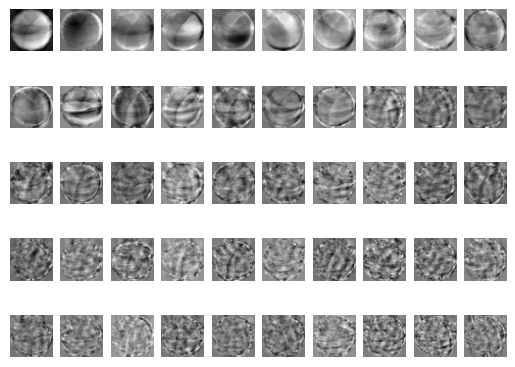

In [13]:
pca_component_3d = pca.components_.reshape(-1,100,100)
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(pca_component_3d[i],cmap='gray_r')
  plt.axis('off')
plt.show()

원본 복귀

In [19]:
# 주성분 분석을 적용한 데이터  10000--> 50
data_pca = pca.transform(data.reshape(300,-1))

In [20]:
invert_data =  pca.inverse_transform(data_pca)
invert_data.shape

(300, 10000)

In [25]:
top100 = invert_data.reshape(300,100,100)[-100:]
top100.shape

(100, 100, 100)

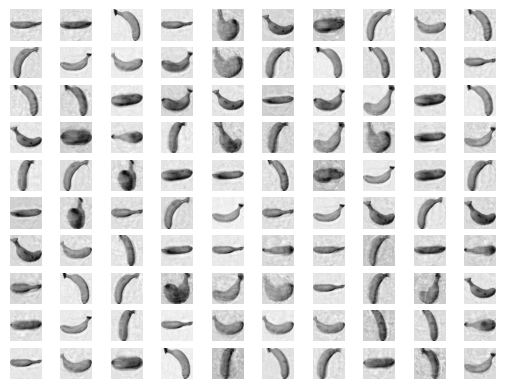

In [26]:
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(top100[i],cmap='gray_r')
  plt.axis('off')
plt.show()

In [27]:
pca.explained_variance_  # 설명된 분산

array([13825250.21582003,  3244970.17261192,  2147002.11072804,
        1315766.76701661,  1115261.57182818,  1071019.42512485,
         839909.33515216,   670735.97207816,   447908.410795  ,
         438278.50235861,   376058.33814779,   308314.26932114,
         286653.13023116,   276360.40144283,   226209.96644976,
         210588.27309774,   188950.41878358,   166854.80512664,
         158753.24751164,   156783.96106116,   146172.36182401,
         142739.13907268,   133182.60697582,   127116.97076572,
         121562.99370861,   117272.08462782,   108186.1306051 ,
         103734.84125867,    99314.92181942,    99146.45263234,
          94253.21448717,    90038.61007091,    86486.01492502,
          83507.32961159,    82256.15405065,    80742.30185826,
          78166.83141188,    75360.62603562,    72479.42229279,
          70721.32303824,    69575.93399952,    64033.56121483,
          62696.91757432,    61707.78996262,    59810.2964384 ,
          59159.42814168,    56576.38207

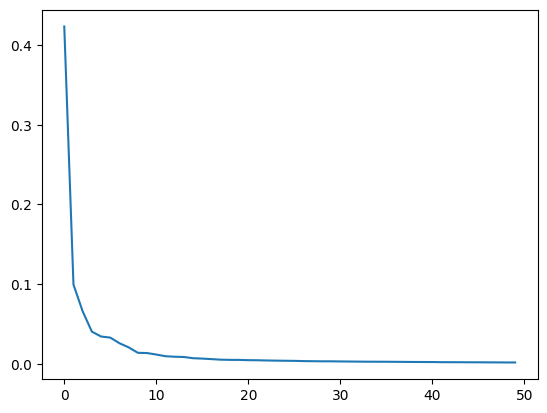

In [30]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

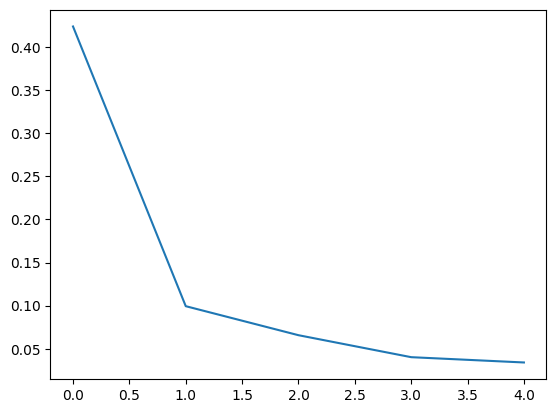

In [35]:
data_2dim = data.reshape(300,-1)
pca = PCA(n_components=5)  # n_components 주성분의 개수
pca.fit(data_2dim)
plt.plot(pca.explained_variance_ratio_)
plt.show()

다른 알고리즘과 함께 사용됨
  - 선형모델중에서 분류모델과 함께 사용해 보기

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [37]:
target = np.array([0]*100 + [1]*100+[2]*100)

In [40]:
data_2d = data.reshape(300,-1)
data_2d.shape

(300, 10000)

In [41]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,data_2d,target)
scores

{'fit_time': array([2.47803283, 3.4447341 , 2.34543777, 1.96377587, 1.65847111]),
 'score_time': array([0.00276685, 0.01537251, 0.00809932, 0.00670648, 0.00250244]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [43]:
np.mean(scores['test_score']), np.mean(scores['fit_time'])

(0.9966666666666667, 2.378090333938599)

In [46]:
pca = PCA(n_components=50,random_state=50)
data_2d_pca = pca.fit_transform(data_2d)
scores = cross_validate(lr,data_2d_pca,target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

(1.0, 0.04640517234802246)

In [57]:
lr = LogisticRegression(max_iter=1000)
pca = PCA(n_components=2,random_state=50)  # 50% 줄인다  n_components=0.5
data_2d_pca = pca.fit_transform(data_2d)
scores = cross_validate(lr,data_2d_pca,target)
np.mean(scores['test_score']), np.mean(scores['fit_time'])

(0.9966666666666667, 0.0990077018737793)

In [58]:
pca.components_.shape

(2, 10000)

In [59]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=50,n_init='auto')
km.fit(data_2d_pca)

KMeans(n_clusters=3, n_init='auto', random_state=50)

In [60]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

In [61]:
data_2d_pca.shape

(300, 2)

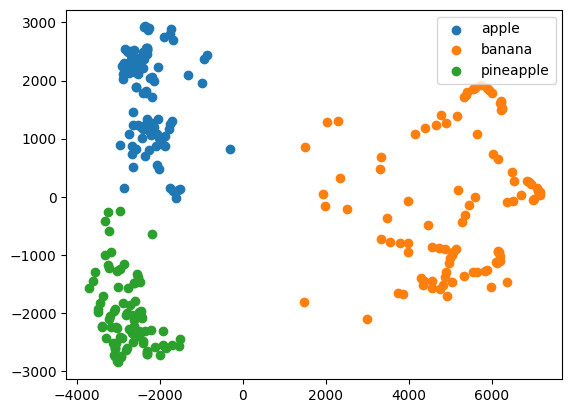

In [66]:
for i,name in enumerate(['apple','banana','pineapple']):
  label_index = np.where(km.labels_ == i)
  plt.scatter(data_2d_pca[label_index][:,0], data_2d_pca[label_index][:,1],label=name)
plt.legend()
plt.show()

In [67]:
from sklearn.datasets import load_breast_cancer
X = load_breast_cancer().data
y = load_breast_cancer().target

In [68]:
X.shape

(569, 30)

In [81]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [82]:
X_pca.shape

(569, 2)

In [83]:
lr = LogisticRegression(max_iter=1000,random_state=50)
score = cross_validate(lr,X_pca,y)
np.mean(score['test_score']),np.mean(score['fit_time'])

(0.9244216736531594, 0.00699162483215332)

In [84]:
lr = LogisticRegression(max_iter=3000,random_state=50)
score = cross_validate(lr,X,y)
np.mean(score['test_score']),np.mean(score['fit_time'])

(0.9507995652848935, 0.896922254562378)